# Pulse Data Exploration: PCA Plot for Wellbeing Questionnaire 

### Step 1: Import all necessary libraries to perform analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn as sk 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Step 2:  Load csv as pandas dataframe, so that values can be easily manipulated

In [2]:
df = pd.read_csv('Wellbeing Questionnaire csv.csv')
df.head()

,Net ID,How many younger siblings do you have?,How many older siblings do you have?,How would you rank your overall wellbeing right now on a scale from 1-10?,Rank these factors in terms of how much they're affecting your current wellbeing. - Lack of sleep/bad quality of sleep,Rank these factors in terms of how much they're affecting your current wellbeing. - excessive academic workload,Rank these factors in terms of how much they're affecting your current wellbeing. - imbalance in nutrition,Rank these factors in terms of how much they're affecting your current wellbeing. - lack of physical exercise,Rank these factors in terms of how much they're affecting your current wellbeing. - dehydration,Rank these factors in terms of how much they're affecting your current wellbeing. - caffeine intake,...,How much water do you think you should drink daily? (in liters),How much water do you drink in a day? (1 liter is about 4 cups),"Do you drink tea,coffee, energy drinks, or soda?",How many caffeinated drinks do you drink in a day on average?,Use the slider to answer the following questions - How much does family situation negatively affect your wellbeing?,Use the slider to answer the following questions - How much do financial difficulties negatively affect your wellbeing?,Use the slider to answer the following questions - How much does fulfilling other responsibilities negatively affect your wellbeing?,Have you experienced or seen bullying at DKU?,Are you currently diagnosed with a mental health disorder?,[OPTIONAL] Which diagnosis
0,hcc18,2,0,4,5,2,3,4,6,7,...,2,1,no,NaN,4.0,3.0,5.0,No,NaN,NaN
1,na202,2,0,7,2,1,4,5,3,7,...,4+,1,no,NaN,NaN,NaN,5.0,No,NaN,NaN
2,ick8,1,1,7,2,1,5,4,6,7,...,2,1,yes,1.0,8.0,NaN,6.0,Yes,Anxiety,NaN
3,xl368,1,0,8,1,3,5,6,4,7,...,2,1,yes,1.0,9.0,8.0,8.0,Maybe,Other,NaN
4,zg95,1,0,6,1,4,5,3,6,7,...,3,2,no,NaN,7.0,5.0,6.0,No,NaN,NaN


### Step 3: Clean data 
#### Net ID was removed to assist with the following step.
#### The last column was removed since they were all NaN values.

In [3]:
df = df.drop(columns=['Net ID', '[OPTIONAL] Which diagnosis'])

### Step 4: Make all data interval rather than categorical 
#### This is done via hot encoding- if you have a column with three categories, 3 columns will be created for each category and each option will either be 0, 1, or 2, within the values of each cell. 
#### Done via pandas get_dummies

In [4]:
df_dummified = pd.get_dummies(df) 
df_dummified.head()

,How many younger siblings do you have?,How many older siblings do you have?,How would you rank your overall wellbeing right now on a scale from 1-10?,Rank these factors in terms of how much they're affecting your current wellbeing. - Lack of sleep/bad quality of sleep,Rank these factors in terms of how much they're affecting your current wellbeing. - excessive academic workload,Rank these factors in terms of how much they're affecting your current wellbeing. - imbalance in nutrition,Rank these factors in terms of how much they're affecting your current wellbeing. - lack of physical exercise,Rank these factors in terms of how much they're affecting your current wellbeing. - dehydration,Rank these factors in terms of how much they're affecting your current wellbeing. - caffeine intake,Rank these factors in terms of how much they're affecting your current wellbeing. - overall mental stress,...,How much water do you drink in a day? (1 liter is about 4 cups)_3,How much water do you drink in a day? (1 liter is about 4 cups)_4+,"Do you drink tea,coffee, energy drinks, or soda?_no","Do you drink tea,coffee, energy drinks, or soda?_yes",Have you experienced or seen bullying at DKU?_Maybe,Have you experienced or seen bullying at DKU?_No,Have you experienced or seen bullying at DKU?_Yes,Are you currently diagnosed with a mental health disorder?_Anxiety,Are you currently diagnosed with a mental health disorder?_Depression,Are you currently diagnosed with a mental health disorder?_Other
0,2,0,4,5,2,3,4,6,7,1,...,0,0,1,0,0,1,0,0,0,0
1,2,0,7,2,1,4,5,3,7,6,...,0,0,1,0,0,1,0,0,0,0
2,1,1,7,2,1,5,4,6,7,3,...,0,0,0,1,0,0,1,1,0,0
3,1,0,8,1,3,5,6,4,7,2,...,0,0,0,1,1,0,0,0,0,1
4,1,0,6,1,4,5,3,6,7,2,...,0,0,1,0,0,1,0,0,0,0


#### Replace NaN values for 0 

In [5]:
df_dummified = df_dummified.fillna(0)

### Step 5: Get features list from dataframe 
#### AKA column names- this is to ultimately assist with PCA labeling 

In [6]:
columns = df_dummified.columns
features = columns.tolist()
columns.tolist()

['How many younger siblings do you have?',
 'How many older siblings do you have?',
 'How would you rank your overall wellbeing right now on a scale from 1-10?',
 "Rank these factors in terms of how much they're affecting your current wellbeing. - Lack of sleep/bad quality of sleep",
 "Rank these factors in terms of how much they're affecting your current wellbeing. - excessive academic workload",
 "Rank these factors in terms of how much they're affecting your current wellbeing. - imbalance in nutrition",
 "Rank these factors in terms of how much they're affecting your current wellbeing. - lack of physical exercise",
 "Rank these factors in terms of how much they're affecting your current wellbeing. - dehydration",
 "Rank these factors in terms of how much they're affecting your current wellbeing. - caffeine intake",
 "Rank these factors in terms of how much they're affecting your current wellbeing. - overall mental stress",
 'What do you think is the optimum amount of sleep for a col

In [7]:
features.remove('How would you rank your overall wellbeing right now on a scale from 1-10?')

### Step 6: Standardize the data 
#### PCA output affected by scale, so this will make the mean 0 and the variance 1. 

In [8]:
x = df_dummified.loc[:, features].values
y = df.loc[:,['How would you rank your overall wellbeing right now on a scale from 1-10?']].values

x = StandardScaler().fit_transform(x)

### Step 7: PCA Projection to 2D
#### Reduces the dimensions from our dataframe down to two, from each of our points to now two principal components 

In [9]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [10]:
finalDf = pd.concat([principalDf, df[['How would you rank your overall wellbeing right now on a scale from 1-10?']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,How would you rank your overall wellbeing right now on a scale from 1-10?
0,3.244928,0.710275,4
1,1.721070,0.064315,7
2,1.033374,-0.235366,7
3,0.912806,-1.718623,8
4,0.110623,2.191671,6


### Step 8: Visualize 2D projection 
#### Given our "target" value, we color each point from the principal component. 

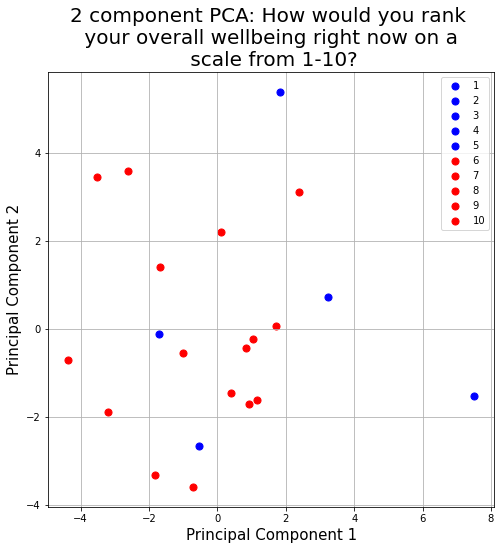

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA: How would you rank \n your overall wellbeing right now on a \n scale from 1-10?', fontsize = 20)

targets1 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
targets = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
colors = ['b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['How would you rank your overall wellbeing right now on a scale from 1-10?'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)

ax.grid()